# Implementation of a KAN for classification
In this notebook we implement a Kolmogorov-Arnold Network (KAN) for the use of classification with the Titanic dataset

## Initializations

In [ ]:
!pip install pykan

In [ ]:
import torch
from kan import *
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import moviepy.video.io.ImageSequenceClip
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
'''
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu") '''

device = torch.device("cpu")

print(device)

cpu


##Loading the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
heart_dataset_dirty = pd.read_csv('/content/drive/Shareddrives/DeepLearning/FinalProject/data/heart_statlog_cleveland_hungary_final.csv')

In [ ]:
print("Train Data Columns:", heart_dataset_dirty.columns)

Train Data Columns: Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


In [ ]:
# DATASET STRUCTURE
print(heart_dataset_dirty.head(5))

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


In [ ]:
# LOAD DATASET

from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader

def load_heart_dataset(dataset):

    # Split the data into features and target variable
    X = dataset.drop('target', axis=1)
    y = dataset['target']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(X_train.head(10))

    # TRAIN TENSOR

    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32, device=device)

    # TEST TENSOR

    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32, device=device)

    # TRAIN AND TEST LABELS
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32, device=device)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32, device=device)
    print(X_train_tensor[:10], y_test_tensor[:10])

    dataset = {}
    dataset['train_input'] = X_train_tensor
    dataset['test_input'] = X_test_tensor
    dataset['train_label'] = y_train_tensor.unsqueeze(1)
    dataset['test_label'] = y_test_tensor.unsqueeze(1)

    return dataset

heart_dataset = load_heart_dataset(heart_dataset_dirty)

      age  sex  chest pain type  resting bp s  cholesterol  \
1005   63    1                4           130          330   
224    33    1                3           120          298   
798    56    0                4           134          409   
816    77    1                4           125          304   
427    56    1                2           126          166   
477    51    1                4           132          218   
327    45    1                3           110            0   
660    46    1                2           101          197   
832    41    0                2           130          204   
43     52    1                3           140          259   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
1005                    1            2             132                1   
224                     0            0             185                0   
798                     0            2             150                1   
816              

In [ ]:
# LOAD DATASET NORMALIZED

from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader

def load_heart_dataset_normalized(dataset):

    # Split the data into features and target variable
    X = dataset.drop('target', axis=1)
    y = dataset['target']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    print(X_train[:10])

    # Convert features and labels to tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32, device=device)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32, device=device)

    dataset = {
        'train_input': X_train_tensor,
        'test_input': X_test_tensor,
        'train_label': y_train_tensor.unsqueeze(1),
        'test_label': y_test_tensor.unsqueeze(1)
    }

    return dataset

heart_dataset = load_heart_dataset_normalized(heart_dataset_dirty)

[[ 9.74135223e-01  5.67646212e-01  8.17594102e-01 -1.07462831e-01
   1.20308498e+00  1.90890085e+00  1.49683368e+00 -3.14306425e-01
   1.28522783e+00  8.15794024e-01 -1.00733062e+00]
 [-2.20689633e+00  5.67646212e-01 -2.47179612e-01 -6.50480956e-01
   8.82545708e-01 -5.23861678e-01 -8.01530291e-01  1.77979697e+00
  -7.78072162e-01 -8.25756750e-01 -1.00733062e+00]
 [ 2.31894527e-01 -1.76166066e+00  8.17594102e-01  1.09744419e-01
   1.99441631e+00 -5.23861678e-01  1.49683368e+00  3.96898501e-01
   1.28522783e+00  9.06991289e-01  6.18057090e-01]
 [ 2.45861662e+00  5.67646212e-01  8.17594102e-01 -3.78971893e-01
   9.42646822e-01 -5.23861678e-01  1.49683368e+00  8.71035118e-01
   1.28522783e+00 -8.25756750e-01 -1.00733062e+00]
 [ 2.31894527e-01  5.67646212e-01 -1.31195333e+00 -3.24670081e-01
  -4.39678786e-01 -5.23861678e-01  3.47651692e-01  1.78465288e-03
  -7.78072162e-01 -8.25756750e-01 -1.00733062e+00]
 [-2.98277399e-01  5.67646212e-01  8.17594102e-01  1.14079438e-03
   8.11975301e-02  

## LOAD + TRAIN KAN

In [ ]:
X_train_tensor = heart_dataset['train_input'].to(device)
y_train_tensor = heart_dataset['train_label'].to(device)
X_test_tensor = heart_dataset['test_input'].to(device)
y_test_tensor = heart_dataset['test_label'].to(device)

In [ ]:
print(X_train_tensor.shape)
print(y_train_tensor.shape)
print(X_test_tensor.shape)
print(y_test_tensor.shape)

torch.Size([952, 11])
torch.Size([952, 1])
torch.Size([238, 11])
torch.Size([238, 1])


In [ ]:
model = KAN(width=[11, 15, 5, 1], grid=10, k=4, seed=0)
model.to(device)

model(X_train_tensor)
print("done")

done


In [ ]:
import time

image_folder = '/content/drive/Shareddrives/DeepLearning/FinalProject/arol/results'
def train_acc():
    # Get model predictions
    logits = model(heart_dataset['train_input'])
    # Apply sigmoid to get probabilities
    probs = torch.sigmoid(logits)
    # Convert probabilities to binary predictions (threshold = 0.5)
    preds = (probs > 0.5).float()
    true_labels = heart_dataset['train_label'][:, 0]  # 'survived' column
    # Calculate accuracy
    return torch.mean((preds[:, 0] == true_labels).float())

def test_acc():
    # Get model predictions
    logits = model(heart_dataset['test_input'])
    # Apply sigmoid to get probabilities
    probs = torch.sigmoid(logits)
    # Convert probabilities to binary predictions (threshold = 0.5)
    preds = (probs > 0.5).float()
    true_labels = heart_dataset['test_label'][:, 0]  # 'survived' column
    # Calculate accuracy
    return torch.mean((preds[:, 0] == true_labels).float())

start_time = time.time()

# Usage
results = model.train(heart_dataset, opt="Adam", device=device, metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.BCEWithLogitsLoss(), steps=100, save_fig=False, img_folder=image_folder, lr=0.05)

# Calculate and print the elapsed time
end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTraining completed in {elapsed_time:.2f} seconds")


train loss: 3.08e-02 | test loss: 8.35e-01 | reg: 5.18e+01 : 100%|█| 100/100 [01:31<00:00,  1.10it/s


Training completed in 91.34 seconds


In [ ]:
results['train_acc'][-1], results['test_acc'][-1]

(1.0, 0.8991596698760986)

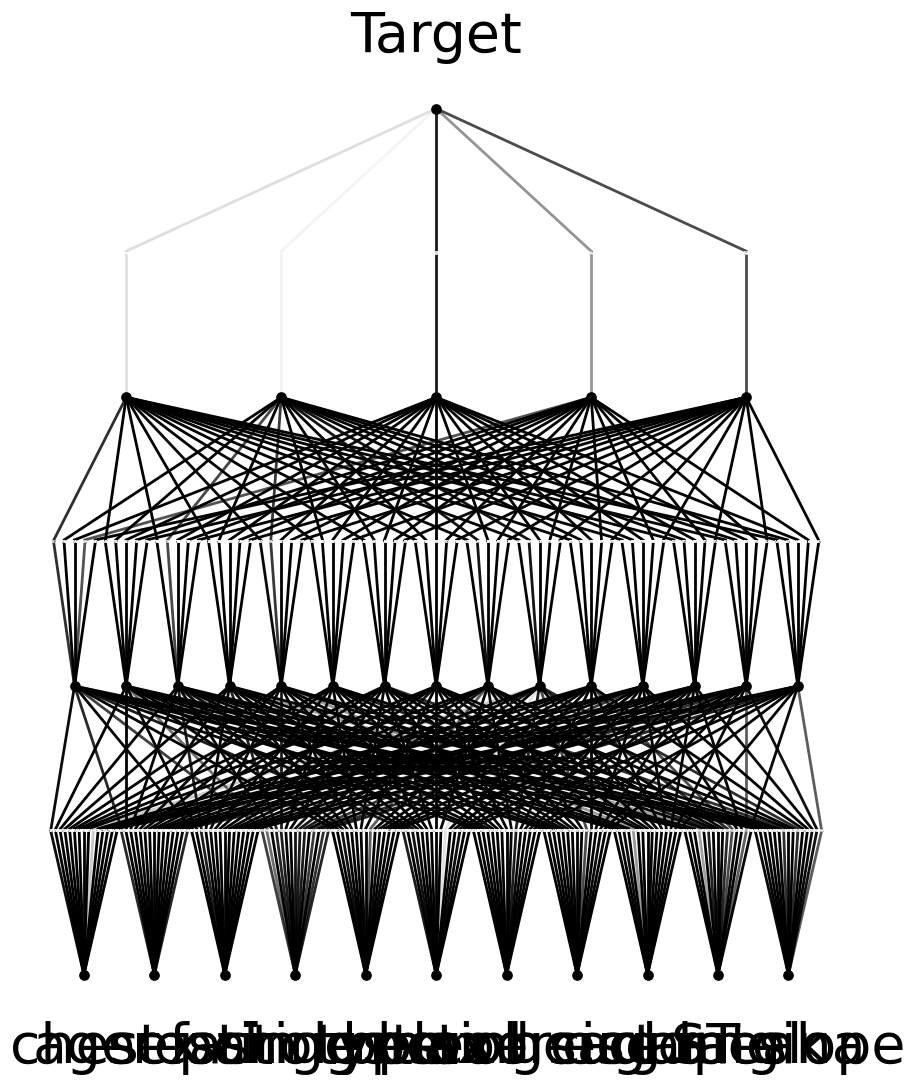

In [ ]:
model.plot(beta=100, scale=1, in_vars=['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'], out_vars=['Target'])

In [ ]:
# REFINING THE GRID SIZE --> DOES NOT WORK! WORSE ACCURACY

model2 = KAN(width=[11,3,1], grid = 20, k=4)
model2.initialize_from_another_model(model, heart_dataset['train_input'])
model2(heart_dataset['train_input'])

results2 = model2.train(heart_dataset, opt="Adam", device=device, metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss(), steps=200, lamb=0.01, lamb_entropy=10., save_fig=False, img_folder=image_folder, lr=0.12)

print("")
print(results2['train_acc'][-1], results2['test_acc'][-1])

train loss: -0.00e+00 | test loss: -0.00e+00 | reg: 6.13e+00 : 100%|█| 200/200 [00:34<00:00,  5.73it


0.4768907427787781 0.4495798349380493


In [ ]:
model_pruned = model.prune()
model(heart_dataset['train_input'])
print("done")

done


In [ ]:
results3 = model_pruned.train(heart_dataset, opt="Adam", device=device, metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.BCEWithLogitsLoss(), steps=50, lamb=0.01, lamb_entropy=10., lr=0.05)
results3['train_acc'][-1], results3['test_acc'][-1]

train loss: 2.28e-01 | test loss: 7.29e-01 | reg: 1.30e+02 : 100%|██| 50/50 [00:49<00:00,  1.01it/s]


(1.0, 0.8991596698760986)

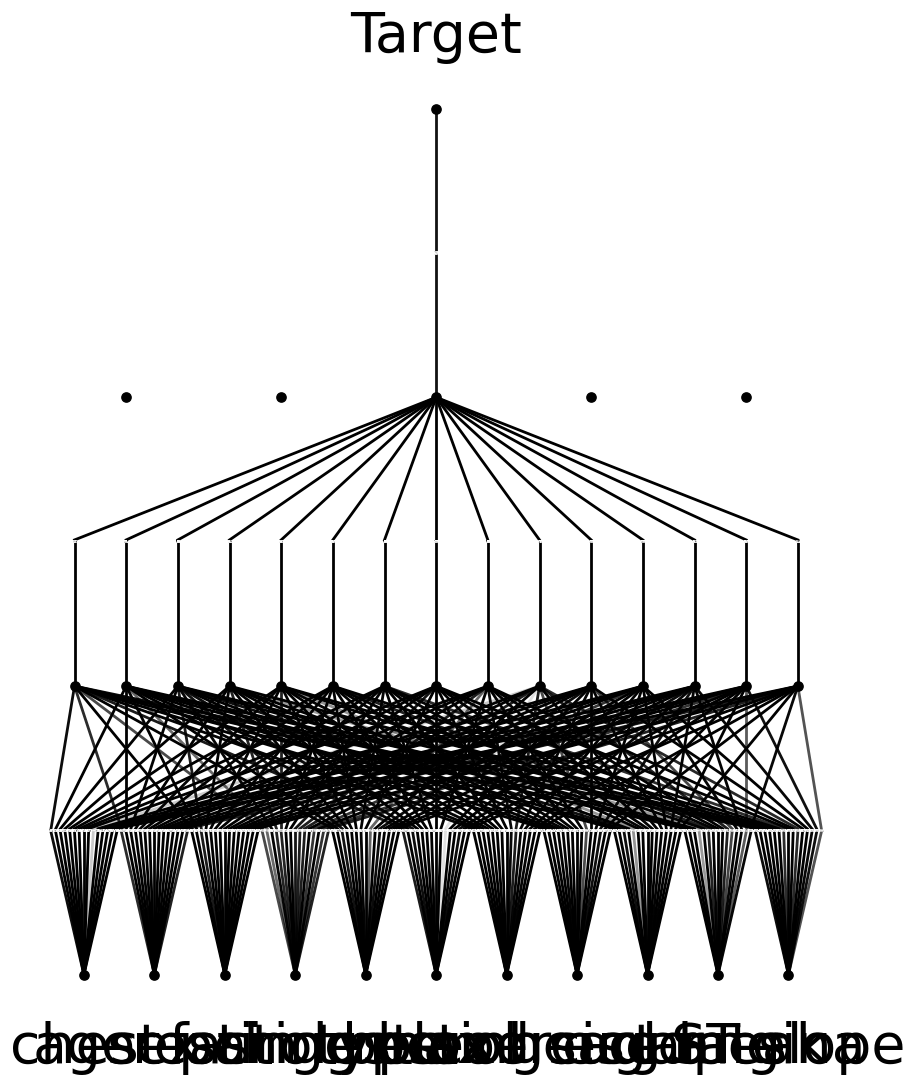

In [ ]:
model.plot(beta=100, scale=1, in_vars=['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'], out_vars=['Target'])